In [26]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import common

common.pltsetup()

In [27]:
def load_distrib(name):
    contents = Path(f'data/forks/{name}.txt').read_text()
    lines = [line.split() for line in contents.splitlines() if line]
    x = [int(v) for v, _ in lines]
    y = [int(v) for _, v in lines]
    y_cum = np.cumsum(y[::-1])[::-1]
    return (x, y_cum)

## Fork networks

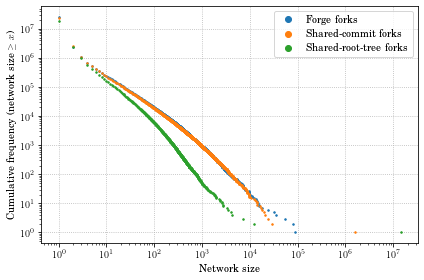

In [46]:
x_swh_rev, y_swh_rev = load_distrib('networks/swh_rev')
x_swh_rootdir, y_swh_rootdir = load_distrib('networks/swh_rootdir')
x_ght, y_ght = load_distrib('networks/ghtorrent')

plt.figure()
plt.xlabel("Network size")
plt.ylabel("Cumulative frequency (network size $\geq x$)")
plt.xscale('log')
plt.yscale('log')
plt.plot(x_ght, y_ght, '.', markersize=3, label="Forge forks", rasterized=True)
plt.plot(x_swh_rev, y_swh_rev, '.', markersize=3, label="Shared-commit forks", rasterized=True)
plt.plot(x_swh_rootdir, y_swh_rootdir, '.', markersize=3, label="Shared-root-tree forks", rasterized=True)
plt.legend(markerscale=4)
plt.grid()
plt.savefig('../img/forks/fork-network-freq-distribution.pdf', dpi=200)

## Fork cliques

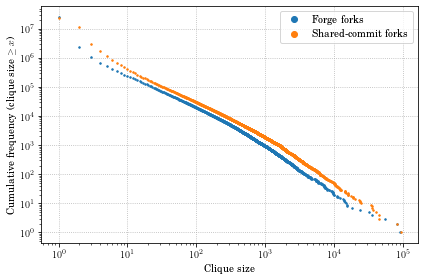

In [47]:
x_swh, y_swh = load_distrib('cliques/swh')
x_ght, y_ght = load_distrib('cliques/ghtorrent')

plt.figure()
plt.xlabel("Clique size")
plt.ylabel("Cumulative frequency (clique size $\geq x$)")
plt.xscale('log')
plt.yscale('log')
plt.plot(x_ght, y_ght, '.', markersize=3, label="Forge forks", rasterized=True)
plt.plot(x_swh, y_swh, '.', markersize=3, label="Shared-commit forks", rasterized=True)
plt.legend(markerscale=4)
plt.grid()
plt.savefig('../img/forks/fork-clique-freq-distribution.pdf', dpi=200)

## Fork p-cliques

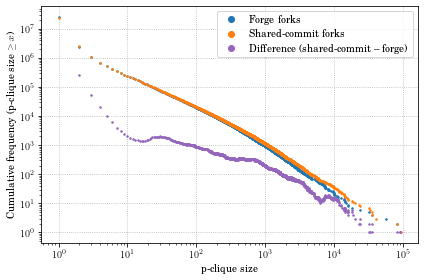

In [53]:
x_swh, y_swh = load_distrib('cliques_partition/swh')
x_ght, y_ght = load_distrib('cliques_partition/ghtorrent')

swhidx = dict(zip(x_swh, y_swh))
ghtidx = dict(zip(x_ght, y_ght))
curr_swh = 0
curr_ght = 0
diffdict = {}
for k in sorted(set([*swhidx.keys(), *ghtidx.keys()])):
    curr_swh = swhidx.get(k, curr_swh)
    curr_ght = ghtidx.get(k, curr_ght)
    diffdict[k] = curr_swh - curr_ght

# diffdict = {k: swhidx.get(k, 0) - ghtidx.get(k, 0) for k in set([*swhidx.keys(), *ghtidx.keys()])}
x_diff = list(diffdict.keys())
y_diff = list(diffdict.values())

plt.figure()
plt.xlabel("p-clique size")
plt.ylabel("Cumulative frequency (p-clique size $\geq x$)")
plt.xscale('log')
plt.yscale('log')
plt.plot(x_ght, y_ght, '.', markersize=3, label="Forge forks", rasterized=True)
plt.plot(x_swh, y_swh, '.', markersize=3, label="Shared-commit forks", rasterized=True)
plt.plot(x_diff, y_diff, '.', color='tab:purple', markersize=3, label="Difference (shared-commit -- forge)", rasterized=True)
plt.legend(markerscale=4)
plt.grid()
plt.savefig('../img/forks/fork-clique-partition-freq-distribution.pdf', dpi=200)